<b>Anomaly/Outlier</b><br>
Any data point/observation that deviates significantly from the other observations is called an Anomaly/Outlier.<br>
Anomaly detection is important and finds its application in various domains like detection of fraudulent bank transactions, network intrusion detection, sudden rise/drop in sales, change in customer behavior, etc.

Isolation Forests – an unsupervised anomaly detection technique

This approach employs binary trees to detect anomalies, resulting in a linear time complexity and low memory usage that is well-suited for processing large datasets.

<b>" IsolationForests were built based on the fact that anomalies are the data points that are 'few and different' "</b>

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

The process of spliting of features is repeated until every leaf of the tree represents a single data point from the dataset

When performing inference using a trained Isolation Forest model the final anomaly score is reported as the average across scores reported by each individual decision tree.(which is the average of the depth of that points given from all the isolated trees)

Reference Links : <br>
https://medium.com/@corymaklin/isolation-forest-799fceacdda4<br>
https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

<b>Anomaly Score Formula</b><br>
$$
s(x,m) = 2^\frac{-E(h(x))}{c(m)}
$$<br>
where E(h(x)) is the average value of h(x) from a collection of iTrees. It is interesting to note that for any given instance:<br>
    1. if s is close to 1 them x is very likely to be an anomaly<br>
    2. if s is smaller than 0.5 then x is likely to be normal value<br>
    3. if for a given sample all instances are assigned an anomaly score of around 0.5, then it is safe to assume that the<br> 
       sample doesn't have any anomaly

In [17]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
X, y = make_regression(n_samples=150, n_features=2, noise=1, random_state=42)
X[:5]

array([[ 0.25049285,  0.34644821],
       [ 0.05820872, -1.1429703 ],
       [ 0.21409374, -1.24573878],
       [-0.83921752, -0.30921238],
       [ 0.36163603, -0.64511975]])

In [16]:
df=pd.DataFrame(X)
df.head()

,0,1
0,0.250493,0.346448
1,0.058209,-1.142970
2,0.214094,-1.245739
3,-0.839218,-0.309212
4,0.361636,-0.645120


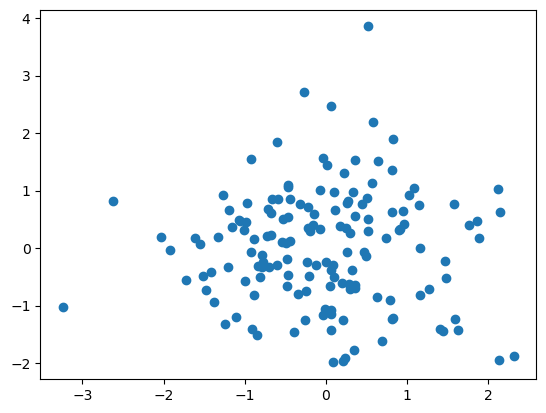

In [18]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [19]:
from sklearn.ensemble import IsolationForest

In [34]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [35]:
predictions

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [36]:
import numpy as np
index = np.where(predictions<0)
index

(array([  6,  13,  19,  25,  26,  37,  38,  39,  40,  42,  49,  51,  54,
         56,  71,  72,  75,  78,  82,  85,  92,  96, 100, 103, 111, 120,
        122, 125, 126, 136], dtype=int64),)

In [37]:
x=df.values

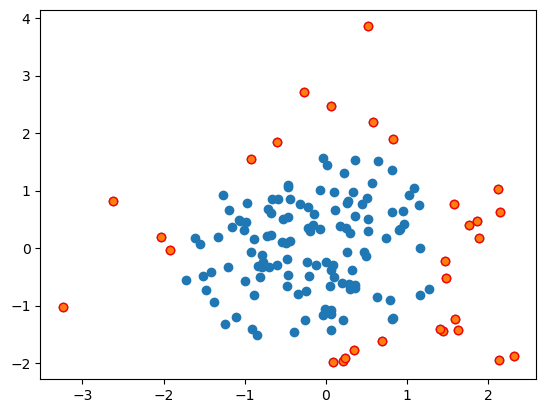

In [38]:
index = np.where(predictions<0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors='r')